In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [8]:
df = pd.read_csv('/Users/apple/Documents/Salary_Data.csv')

In [14]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [34]:
x_train, y_train = np.asarray(df["YearsExperience"]), np.asarray(df["Salary"])

In [36]:
x_train.shape

(30,)

In [38]:
type(x_train)

numpy.ndarray

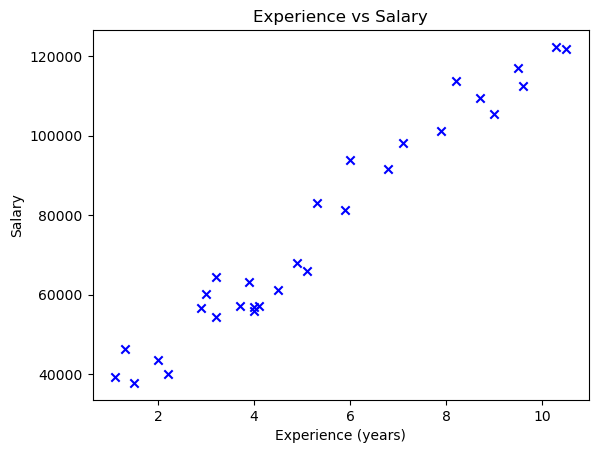

In [42]:
plt.scatter(x_train, y_train, marker ='x', c='b')
plt.title("Experience vs Salary")
plt.ylabel("Salary")
plt.xlabel("Experience (years)")
plt.show()

In [44]:
def compute_gradient(x, y, w, b): 
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb_i = np.dot(x[i], w)+b
        dj_db = dj_db + (f_wb_i - y[i])
        dj_dw = dj_dw + (f_wb_i - y[i])*x[i]
    dj_db = dj_db / m
    dj_dw = dj_dw/m
    
    return dj_dw, dj_db

In [44]:
def compute_gradient(x, y, w, b): 
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb_i = np.dot(x[i], w)+b
        dj_db = dj_db + (f_wb_i - y[i])
        dj_dw = dj_dw + (f_wb_i - y[i])*x[i]
    dj_db = dj_db / m
    dj_dw = dj_dw/m
    
    return dj_dw, dj_db

In [46]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    total_cost = 0
    
    for i in range (m):
        f_wb_i = np.dot(x[i], w)+b
        total_cost += (f_wb_i-y[i])**2
    
    total_cost = (1/(2*m)) * total_cost

    return total_cost

In [48]:
def gradient_descent(x, y, w, b, cost_func, gradient_func, alpha, n):
    m = x.shape[0]
    J_list = []
    w_list = []

    for i in range (n):
        if i<10000:
            dj_dw, dj_db = gradient_func(x,y,w,b)
            w = w - alpha*dj_dw
            b = b - alpha*dj_db
            cost = cost_func(x,y,w,b)
            J_list.append(cost)
            w_list.append(w)

    return w, b, J_list, w_list

In [54]:
def predict(x,w,b):
    m = x.shape[0]
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = np.dot(x[i], w)+b

    return y_pred

In [52]:
w,b,J_list, w_list = gradient_descent(x_train, y_train, 0, 0, compute_cost, compute_gradient, 0.01, 1500)
w, b

(9597.791052916133, 24796.02161349117)

In [56]:
y_pred = predict(x_train, w, b)

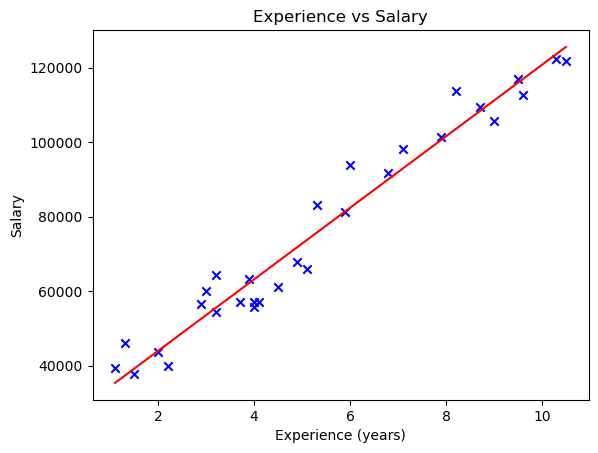

In [62]:
plt.plot(x_train, y_pred, c = "r")
plt.scatter(x_train, y_train, marker ='x', c='b')
plt.title("Experience vs Salary")
plt.ylabel("Salary")
plt.xlabel("Experience (years)")
plt.show()

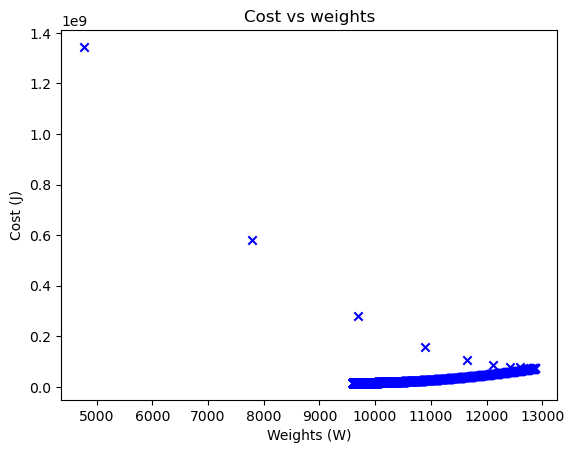

In [66]:
plt.scatter(w_list, J_list, marker ='x', c='b')
plt.title("Cost vs weights")
plt.ylabel("Cost (J)")
plt.xlabel("Weights (W)")
plt.show()

In [68]:
def r2_score(y_true, y_pred):
    mean_y_true = sum(y_true) / len(y_true)
    total_sum_of_squares = sum((yi - mean_y_true) ** 2 for yi in y_true)
    residual_sum_of_squares = sum((yi - y_pred[i]) ** 2 for i, yi in enumerate(y_true))
    r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r2

In [74]:
r2 = r2_score(y_train, y_pred)

In [76]:
r2

0.9566613678714614